# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [202]:
import pandas as pd
import numpy as np

In [203]:
transactions = pd.read_csv("../project_data/project_transactions.csv")

In [204]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [205]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [206]:
transactions.describe().round(2).loc[['max','min'],]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,3.99,102.0,0.00,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.02,1.0,-55.93,-7.7


In [207]:
#day,quantity,store_id,week_no

transactions = transactions.astype({
    'DAY': 'int16',
    'QUANTITY': 'int32',
    'STORE_ID': 'int32',
    'WEEK_NO': 'int8'
})

In [208]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int32  
 5   SALES_VALUE        float64
 6   STORE_ID           int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int16(1), int32(2), int64(3), int8(1)
memory usage: 137.1 MB


In [209]:
transactions.isna().value_counts()

household_key  BASKET_ID  DAY    PRODUCT_ID  QUANTITY  SALES_VALUE  STORE_ID  RETAIL_DISC  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC
False          False      False  False       False     False        False     False        False    False        False                2146311
dtype: int64

In [210]:
transactions[['household_key','PRODUCT_ID']].nunique()

household_key     2099
PRODUCT_ID       84138
dtype: int64

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [211]:
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0


In [212]:
transactions = transactions.assign(
    total_discount = abs(transactions['RETAIL_DISC'] + transactions['COUPON_DISC']),
    total_discount_pct = (lambda x: x['total_discount'] / x['SALES_VALUE'])
                        
)

In [213]:
transactions['total_discount_pct'] = np.where(transactions['total_discount_pct'] > 1,1,0)

In [214]:
transactions.drop(columns=['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'],inplace=True)

In [215]:
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,total_discount_pct
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0
1,1364,26984896261,1,897044,1,2.99,31742,1,0.40,0
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0
3,1364,26984896261,1,937406,1,2.50,31742,1,0.99,0
4,1364,26984896261,1,981760,1,0.60,31742,1,0.79,1
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,0.49,0


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [216]:
total_sales_value = transactions['SALES_VALUE'].sum()
total_discount_value = transactions['SALES_VALUE'].sum()
overall_pct_discount = total_discount_value / total_sales_value
total_quantity_sold = transactions['QUANTITY'].sum()

unique_backet = transactions['BASKET_ID'].nunique()
total_sales_per_basket = total_sales_value / unique_backet

unique_household = transactions['household_key'].nunique()
total_sales_per_household = total_sales_value / unique_household

In [217]:
transactions.loc[transactions['QUANTITY'] == transactions['QUANTITY'].max()]


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,total_discount_pct
1442095,630,34749153595,503,6534178,89638,250.0,384,73,13.45,0


## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


<Axes: xlabel='household_key'>

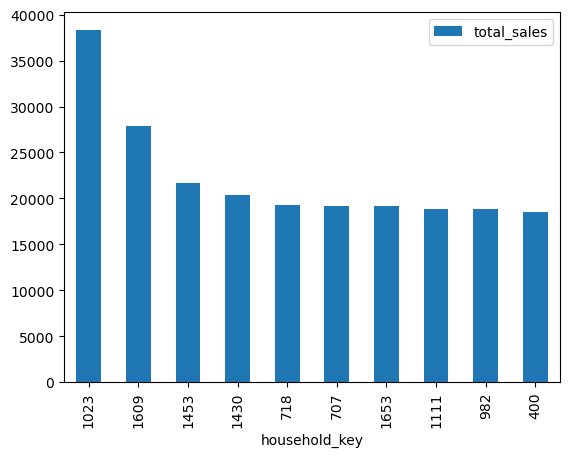

In [218]:
(
    transactions
    .groupby('household_key', as_index=False)
    .agg(
        total_sales = ('SALES_VALUE', 'sum')
    )
    .sort_values(by='total_sales', ascending=False)
    .iloc[:10]
    .plot.bar(
        x='household_key',
        y='total_sales'
    )
)

<Axes: xlabel='household_key'>

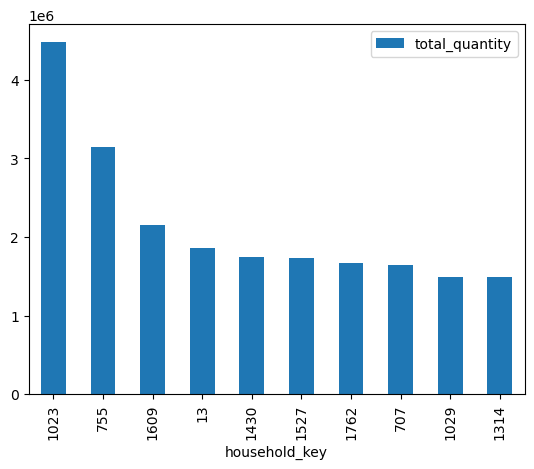

In [219]:
(
    transactions
    .groupby('household_key', as_index=False)
    .agg(
        total_quantity = ('QUANTITY', 'sum')
    )
    .sort_values(by='total_quantity', ascending=False)
    .iloc[:10]
    .plot.bar(
        x='household_key',
        y='total_quantity'
    )
)

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

<Axes: ylabel='PRODUCT_ID'>

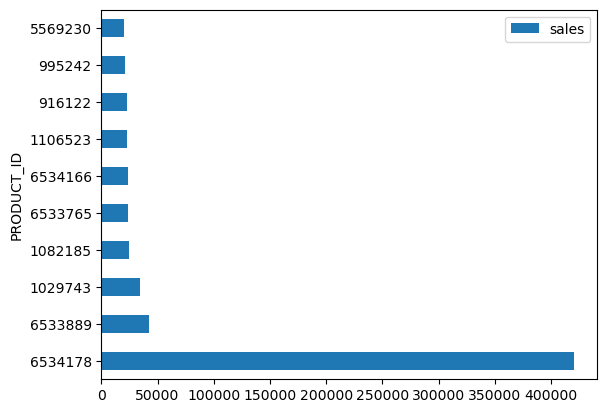

In [224]:
(
    transactions
    .groupby('PRODUCT_ID', as_index=False)
    .agg(
        sales = ('SALES_VALUE', 'sum')
    )
    .sort_values(by='sales', ascending=False)
    .iloc[:10]
    .plot.barh(
        x='PRODUCT_ID',
        y='sales'
    )
)

In [199]:
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,total_discount_pct
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0
1,1364,26984896261,1,897044,1,2.99,31742,1,0.40,0
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0
3,1364,26984896261,1,937406,1,2.50,31742,1,0.99,0
4,1364,26984896261,1,981760,1,0.60,31742,1,0.79,1
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,0.49,0
